# Hate news prediction

In [1]:

import pandas as pd
import numpy as np
#countvectorizer used to convert given text into a vector base on the number like count no.of times each word appears
from sklearn.feature_extraction.text import CountVectorizer
#user for training and testing of data
from sklearn.model_selection import train_test_split
#Supervised machine learning algorithm
#uses a set of principles to make judgements much like how people do
from sklearn.tree import DecisionTreeClassifier

In [2]:
#this function determines whether a given text fails a given regular expression
import re
import nltk
from nltk.util import pr
#stemmer used to remove prefix and suffix
stemmer=nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
#it is used to determine whether or not a substring is a part of main string
import string
#stopwords are a and the
stopword=set(stopwords.words('english'))


In [3]:
dataset=pd.read_csv('twitter_data.csv')
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
#adding labels to detect whether the messages are of 
dataset['labels'] = dataset['class']. map({0: 'Hate Speech', 1: 'Offensive Speech', 2: 'No Hate and Offensive Speech'})
dataset = dataset[['tweet', 'labels']]
print(dataset. head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


In [5]:
dataset.head(20)
dataset.isnull().sum()

tweet     0
labels    0
dtype: int64

In [6]:
dataset.shape

(24783, 2)

In [7]:
# only taking the dataset which contains only two columns i.e labels and tweets
dataset=dataset[['tweet','labels']]
dataset.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech


In [8]:
def clean (text):
    text = str(text).lower()
    text = re.sub('[.?]', '', text)
    text = re.sub('https?://\S+|www.\S+', '', text)
    text = re.sub('<.?>+', '', text)
    text = re.sub('[%s]' % re. escape(string. punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=' '. join(text)
    text = [stemmer. stem(word) for word in text. split(' ')]
    text=' '. join(text)
    return text
dataset['tweet'] = dataset['tweet']. apply(clean)

In [9]:
#creating a function to clean the words and marks like @ !
dataset['tweet']=dataset['tweet'].apply(clean)

In [10]:
dataset.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive Speech
1,rt mlee boy dat coldtyga dwn bad cuffin dat h...,Offensive Speech
2,rt urkindofbrand dawg rt babif ever fuck bitc...,Offensive Speech
3,rt cganderson vivaba look like tranni,Offensive Speech
4,rt shenikarobert shit hear might true might f...,Offensive Speech


In [11]:
x = np. array(dataset['tweet'])
y = np. array(dataset['labels'])
cv = CountVectorizer()
X = cv. fit_transform(x)
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [12]:

model = DecisionTreeClassifier()
#Training the model
model. fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
#Testing the model
y_pred = model. predict (X_test)
y_pred

array(['Offensive Speech', 'Offensive Speech', 'Offensive Speech', ...,
       'No Hate and Offensive Speech', 'Offensive Speech',
       'Offensive Speech'], dtype=object)

In [14]:
#Accuracy Score of our model
from sklearn. metrics import accuracy_score
print (accuracy_score (y_test,y_pred))

0.87504584912581


In [15]:
#Predicting the outcome
inp = str(input('enter a string:'))
inp = cv.transform([inp]).toarray(
)
print(model.predict(inp))

enter a string:palak says bitch
['Offensive Speech']


# Sentimental analysis

In [16]:
!pip install textblob
from textblob import TextBlob

def get_polarity(x):
    blob = TextBlob(x)
    return blob.polarity

def get_subjectivity(x):
    blob = TextBlob(x)
    return blob.subjectivity

In [17]:
#looking at a comment sentiment
blob = TextBlob(dataset.loc[1, 'tweet'])
print(blob, dataset.loc[1, 'labels'])
blob.sentiment

 rt mlee boy dat coldtyga dwn bad cuffin dat hoe 1st place Offensive Speech


Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [18]:
dataset['polarity'] = dataset['tweet'].map(get_polarity)
dataset['subjectivity'] = dataset['tweet'].map(get_subjectivity)

In [19]:
dataset


,tweet,labels,polarity,subjectivity
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive Speech,0.366667,0.700000
1,rt mlee boy dat coldtyga dwn bad cuffin dat h...,Offensive Speech,-0.700000,0.666667
2,rt urkindofbrand dawg rt babif ever fuck bitc...,Offensive Speech,-0.300000,0.700000
3,rt cganderson vivaba look like tranni,Offensive Speech,0.000000,0.000000
4,rt shenikarobert shit hear might true might f...,Offensive Speech,0.075000,0.725000
...,...,...,...,...
24778,yous muthafin lie 0lifeask earl coreyemanuel r...,Offensive Speech,0.285714,0.535714
24779,youv gone broke wrong heart babi drove redneck...,No Hate and Offensive Speech,-0.500000,0.900000
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Speech,0.100000,0.400000
24781,youu got wild bitch tellin lie,Offensive Speech,0.100000,0.400000


In [20]:
dataset[dataset['polarity'] > 0.5].head(10)

,tweet,labels,polarity,subjectivity
10,keek bitch curv everyon lol walk conver like...,Offensive Speech,0.80,0.7
67,allyhaaaaa lemmi eat oreo amp dish one oreo lol,No Hate and Offensive Speech,0.80,0.7
70,arizonasfinest6 eggplant emoji doey say look l...,No Hate and Offensive Speech,0.60,1.0
78,beenbasedb kudabrazyy 0 ring 0 mvps 0 bitch lol,Offensive Speech,0.80,0.7
86,brokenpiecesmsc itsnotadam faggot read tweet d...,Offensive Speech,0.80,0.7
92,caelan dham caelan nigga eat hoe lol hell yea ...,Offensive Speech,0.80,0.7
115,domworldpeac baseb season win yank love start,No Hate and Offensive Speech,0.65,0.5
118,dunderbail im ear bird im night owl im wise worm,No Hate and Offensive Speech,0.70,0.9
121,ferociousghost 1stnamebravo aw fag dont tweet ...,Offensive Speech,0.80,0.7
138,halotgmg 1stnamebravo nigga know hacki sack ho...,Offensive Speech,0.60,1.0


In [26]:
dataset[dataset['polarity'] <1.0].head(10)

,tweet,labels,polarity,subjectivity
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive Speech,0.366667,0.700000
1,rt mlee boy dat coldtyga dwn bad cuffin dat h...,Offensive Speech,-0.700000,0.666667
2,rt urkindofbrand dawg rt babif ever fuck bitc...,Offensive Speech,-0.300000,0.700000
3,rt cganderson vivaba look like tranni,Offensive Speech,0.000000,0.000000
4,rt shenikarobert shit hear might true might f...,Offensive Speech,0.075000,0.725000
5,tmadisonx shit blow meclaim faith somebodi sti...,Offensive Speech,-0.300000,0.700000
6,brighterday sit hate anoth bitch got much shi...,Offensive Speech,-0.500000,0.850000
7,0selfiequeenbri caus im tire big bitch come us...,Offensive Speech,0.000000,0.100000
8,amp might get ya bitch back amp,Offensive Speech,0.000000,0.000000
9,rhythmixx hobbi includ fight mariambitch,Offensive Speech,0.000000,0.000000


<AxesSubplot:xlabel='subjectivity'>

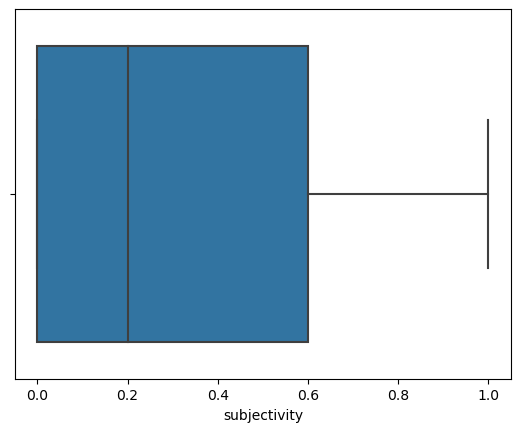

In [22]:
import seaborn as sns
sns.boxplot(x=dataset["subjectivity"])


<AxesSubplot:xlabel='polarity'>

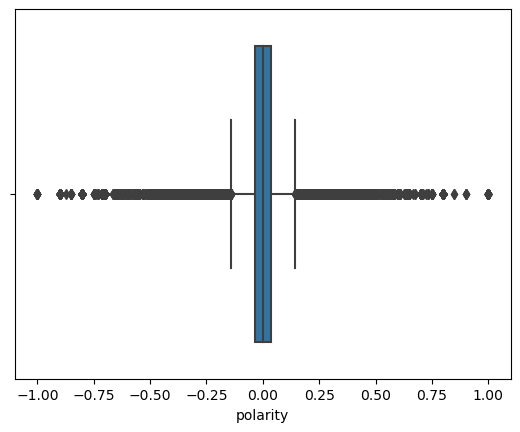

In [23]:
sns.boxplot(x=dataset["polarity"])